# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Nabila Risqi Rosyadi]
- **Email:** [mc006d5x1344@gmail.com]
- **ID Dicoding:** [MC006D5X1344]

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling sering dipesan dalam rentang tahun 2017-2018?
- Bagaimana tren jumlah pesanan per bulan dalam tahun 2018?

data yang diperlukan : orders_dataset.csv , order_items_dataset.csv , products_dataset.csv, dan product_category_translation_name.csv


## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from google.colab import files
import os

In [10]:
uploaded = files.upload()
#untuk mengupload file order_items_dataset secara manual

Saving order_items_dataset.csv to order_items_dataset.csv


In [11]:
uploaded = files.upload()
#untuk mengupload file orders_dataset secara manual di google colab

Saving orders_dataset.csv to orders_dataset.csv


In [36]:
uploaded = files.upload()
#untuk mengupload file product category name

Saving product_category_name_translation.csv to product_category_name_translation.csv


In [37]:
uploaded = files.upload ()
#untuk mengupload file products_csv

Saving products_dataset.csv to products_dataset.csv


## Data Wrangling

### Gathering Data

In [38]:
pesanan_df = pd.read_csv("orders_dataset.csv")
barangdipesan_df = pd.read_csv("order_items_dataset.csv")
namaproduk_df = pd.read_csv("product_category_name_translation.csv")
produk_df = pd.read_csv("products_dataset.csv")

In [39]:
pesanan_df.head()
barangdipesan_df.head()
namaproduk_df.head()
produk_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Pada kode diatas, saya memasukkan terlebih dahulu data apa saja yang ingin diolah dan dianalisis, disini saya menggunakan hanya 2 dataset untuk 2 pertanyaan bisnis
- Pertanyaan 1 terkait produk yang sering dipesan di rentang tahun 2017-2018 menggunakan dataset order_items_dataset dan orders_dataset
- Pertanyaan 2 terkait tren jumlah pesanan per bulan dalam tahun 2018 menggunakan orders_dataset

### Assessing Data

cek missing values

In [40]:
missval_orderItems = barangdipesan_df.isnull().sum()
missval_orders = pesanan_df.isnull().sum()
missval_productcategory = namaproduk_df.isnull().sum()
missval_product = produk_df.isnull().sum()

print("Missing Values in Orders Dataset:\n", missval_orders)
print("Missing Values in Order Items Dataset:\n", missval_orderItems)
print("Missing Values in Product Category Dataset:\n", missval_productcategory)
print("Missing Values in Product Dataset:\n", missval_product)

Missing Values in Orders Dataset:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
Missing Values in Order Items Dataset:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Missing Values in Product Category Dataset:
 product_category_name            0
product_category_name_english    0
dtype: int64
Missing Values in Product Dataset:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm 

cek data duplikat

In [41]:
dpOrderItems_count = barangdipesan_df.duplicated().sum()
dpOrders_count = pesanan_df.duplicated().sum()
dpProductCategory_count = namaproduk_df.duplicated().sum()
dpProduct_count = produk_df.duplicated().sum()

print("Jumlah data duplikat dalam Orders Dataset:", dpOrders_count)
print("Jumlah data duplikat dalam Order Items Dataset:", dpOrderItems_count)
print("Jumlah data duplikat dalam Product Category Dataset:", dpProductCategory_count)
print("Jumlah data duplikat dalam Product Dataset:", dpProduct_count)

Jumlah data duplikat dalam Orders Dataset: 0
Jumlah data duplikat dalam Order Items Dataset: 0
Jumlah data duplikat dalam Product Category Dataset: 0
Jumlah data duplikat dalam Product Dataset: 0


**Insight:**
- Di tahapan ini, saya melakukan pemeriksaan duplikasi data untuk menghindari adanya redudansi data dalam meningkatkan kualitas data agar tidak megakibatkan bias pada data yang akan diidentifikasi
- Pada pengecekan duplikasi diatas, nyatanya tidak ada data yang redundan sehingga aman untuk melakukan tahap Cleaning Data

### Cleaning Data

In [43]:
# menghapus sisa missing value pada dataset

def fill_missing_with_mean(df):
    for col in df.select_dtypes(include=np.number):
        df[col] = df[col].fillna(df[col].mean())

    for col in df.select_dtypes(include=['object']):
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

barangdipesan_df = fill_missing_with_mean(barangdipesan_df)
pesanan_df = fill_missing_with_mean(pesanan_df)
namaproduk_df = fill_missing_with_mean(namaproduk_df)
produk_df = fill_missing_with_mean(produk_df)

In [44]:
#memastikan apakah masih ada data dengan baris yang masih ada missing values

missval_orderItems = barangdipesan_df.isnull().sum()
missval_orders = pesanan_df.isnull().sum()
missval_productcategory = namaproduk_df.isnull().sum()
missval_product = produk_df.isnull().sum()

print("Missing Values in Orders Dataset:\n", missval_orders)
print("Missing Values in Order Items Dataset:\n", missval_orderItems)
print("Missing Values in Product Category Dataset:\n", missval_productcategory)
print("Missing Values in Product Dataset:\n", missval_product)

Missing Values in Orders Dataset:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
Missing Values in Order Items Dataset:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Missing Values in Product Category Dataset:
 product_category_name            0
product_category_name_english    0
dtype: int64
Missing Values in Product Dataset:
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm        

**Insight:**
- Kode diatas untuk menangani missing values pada dataset yang hilang berdasarkan jenis datanya :
a. Kolom Numerik (angka) diisi dengan mean agar nilai yang hilang tetap memiliki hasil pengolahan data yang mendekati distribusi asli data
b. Kolom kategorikal diisi dengan modus untuk menjaga konsistensi dan menghindari kehilangan informasi penting
Setelah proses ini dilakukan, hasilnya menunjukkan bahwa tidak ada lagi nilai yang hilang dalam dataset, yang mana artinya semua data itu sudah terisi dengan metode yang sesuai

## Exploratory Data Analysis (EDA)

### Explore ...

In [51]:
#Menjawab pertanyaan no.1
# Merge dataset utama
merged_df = barangdipesan_df.merge(pesanan_df, on="order_id", how="inner")
merged_df = merged_df.merge(produk_df, on="product_id", how="inner")

# Merge dengan dataset terjemahan kategori produk
merged_df = merged_df.merge(namaproduk_df, on="product_category_name", how="left")

# Filter data untuk tahun 2017-2018
filtered_df = merged_df[(merged_df["order_year"] >= 2017) & (merged_df["order_year"] <= 2018)]
# **Menghitung 20 kategori produk yang paling sering dipesan**
product_counts = filtered_df["product_category_name_english"].value_counts().head(20)

**Insight:**
- Disini saya menggabungkan dataframe untuk product, order_item, dan order
- Juga melakukan perubahan pada kolom order_purchase_timestamo di file order_dataset dan merubahnya menjadi format datetime untuk bisa melakukan filtering data berdasarkan tahun 2017-2018
- Melakukan frekuensi banyaknya produk dan mengambil 20 produk teratas dengan product_id
- Setelah kode ini dijalankan, say aharap bisa menampilkan visualisasi data yang bisa dijadikan penarikan kesimpulan

In [46]:
# Menjawab pertanyaan NO.2
# Bagaimana tren jumlah pesanan per bulan dalam tahun 2018?

# mengubah kolom tanggal dalam format datetime
pesanan_df["order_purchase_timestamp"] = pd.to_datetime(pesanan_df["order_purchase_timestamp"])

# Buat kolom 'order_year' dan 'order_month' untuk dianalisis
pesanan_df["order_year"] = pesanan_df["order_purchase_timestamp"].dt.year
pesanan_df["order_month"] = pesanan_df["order_purchase_timestamp"].dt.month

# Filter hanya untuk data th.2018
pesanan_2018 = pesanan_df[pesanan_df["order_year"] == 2018]

# menghitung jumlah pesanan per bulan
monthly_orders = pesanan_2018.groupby("order_month").size()


Insight :
- Mengubah kolom order_purchase_timestamp menjadi format datetime agar bisa diproses lebih lanjut
- Menambahkan kolom baru untuk tahun (order_year) dan bulan (order_month) dari data tanggal pemesanan
- Menyaring dataset agar hanya mencakup pesanan yang terjadi di tahun 2018
- Mengelompokkan data berdasarkan bulan (prder_month) dan menghitung jumlah pesanan dalam setiap bulannya di tahun 2018

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-52-c19ef90d2ea3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette="viridis")


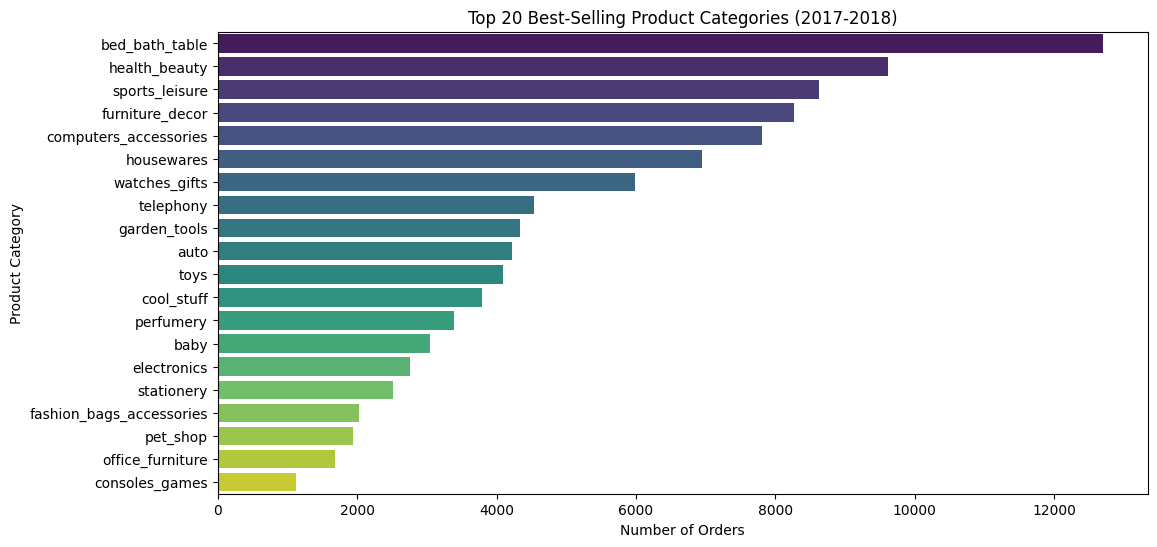

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette="viridis")
plt.title("Top 20 Best-Selling Product Categories (2017-2018)")
plt.xlabel("Number of Orders")
plt.ylabel("Product Category")
plt.show()

Insight ::
- Visualisasi ini digunakan untuk menunjukkan grafik bar chart dengan kategori 20 produk terlaris dalam rentang tahun 2017-2018

### Pertanyaan 2:

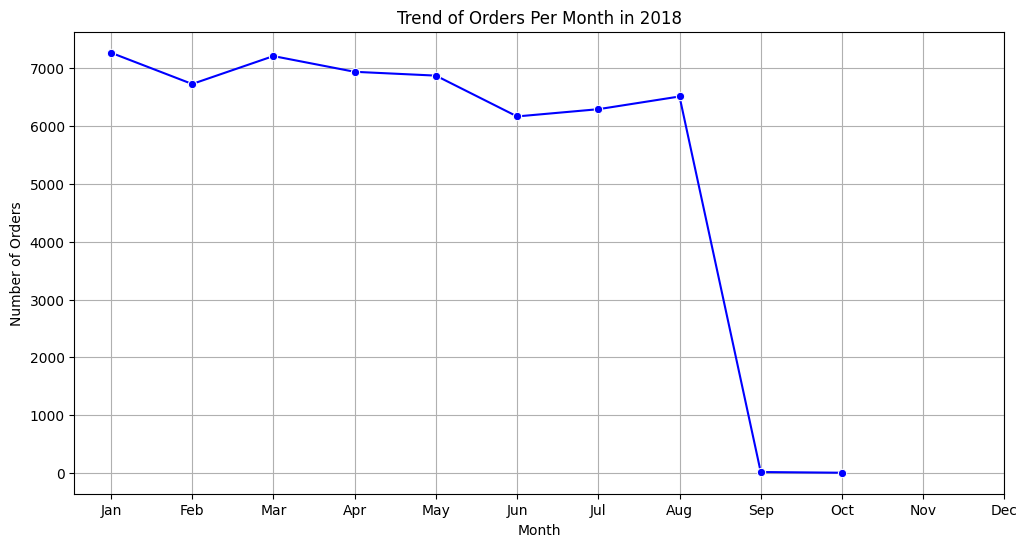

In [54]:
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker="o", color="b")


plt.title("Trend of Orders Per Month in 2018")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(np.arange(1,13,1), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

**Insight:**
- Visualisasi ini digunakan untuk menampilkan jumlah pesanan per bulan dalam tahun 2018 dalam bentuk line chart

## Conclusion

- Conclution pertanyaan 1


*   Dari hasil analisis, 20 kategori produk yang paling dipesan dalam rentang tahun 2017-2018 adalah sebagai berikut : bed & bath, health_beauty, sports & leisure, furniture & decor, computers accessories, housewares, watches_gifts, telephony, garden tools, auto, toys, cool stuff, perfumery, baby, electronics, stationery, fashion bags, pet shop, office furniture, console games
*   Dan disini kita bisa lihat bahwa bed&bath menjadi produk yang paling banyak dipesan dalam periode tersebut , disusul dengan health beauty kemudian sports leisure.

*   Jika perusahaan ingin meningkatkan penjualan, perusahaan bisa fokus pada kategori yang sudah populer dan banyak diminati . Perusahaan juga bisa melakukan berbagai penawaran misalnya diskon, promosi, atau strategi pemasaran yang baru untuk mempertahankan pasar
*   Dan, jika perusahaan ingin meningkatkan penjualan di kategori lain, perusahaan bisa melakukan bundle product untuk kategori dengan peminat rendah


- Conclution pertanyaan 2


*   Dari hasil visualisasi, jumlah pesanan mengalami naik turun atau tidak stabil di sepanjang tahun .  Dan bisa dilihat penjualan dengan pesanan tertinggi ada di bulan November & Desember
*   Terjadi penurunan pesanan di awal tahun, yang mungkin disebabkan oleh periode pasca liburan yang mana pelanggan mengurangi belanja mereka setelah pengeluaran besar di akhir tahun

*   Awal tahun cenderung memiliki lebih sedikit pesanan, sehingga perusahaan bisa menjalankan strategi pemasaran untuk mendorong penjualan di bulan tersebut, seperti diskon awal tahun atau free shipping untuk meningkatkan order.
*   Bisa dilakukan optimasi stok produk berdasarkan pola tren ini, misalnya meningkatkan stok di bulan Oktober - Desember untuk mengantisipasi lonjakan pesanan.



